In [1]:
#import statements - libraries
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras import regularizers, metrics
import numpy as np
import keras.layers
import keras.losses

Using TensorFlow backend.


In [2]:
##Loan MNIST data from Keras
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
# xtrain=xtrain()
maxV = float(xtrain.max())
xtrain=xtrain.astype('float32')/maxV
xtrain=np.reshape(xtrain, (len(xtrain), np.prod(xtrain.shape[1:])))

xtest=xtest.astype('float32')/maxV
xtest=np.reshape(xtest, (len(xtest), np.prod(xtest.shape[1:])))
# print(xtest[0].shape)

In [3]:
##From the dataset (60K, 10K) - get 1000 images, 100 for each digit
digits=list(set(ytrain[:100]))
count=0
index=0
arr=[]
for d in digits:
    count=0
    index=0
    while count<100:
        if(ytrain[index]==d):
            arr.append(xtrain[index])
            count+=1
        index+=1
arr=np.asarray(arr)
print(arr.shape)

(1000, 784)


In [4]:
##Build 3 models for each of the values of N
N=[2, 5, 10]

model1=Sequential()
model1.add(Dense(N[0], input_dim=arr.shape[1], activation='relu'))
model1.add(Dense(arr.shape[1], activation='relu'))

model2=Sequential()
model2.add(Dense(N[1], input_dim=arr.shape[1], activation='relu'))
model2.add(Dense(arr.shape[1], activation='relu'))

model3=Sequential()
model3.add(Dense(N[2], input_dim=arr.shape[1], activation='relu'))
model3.add(Dense(arr.shape[1], activation='relu'))

In [5]:
##Fit the model with training data
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'cosine', metrics.kullback_leibler_divergence])
model_metrics_1 = model1.fit(arr, arr, epochs=100, batch_size=None)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'cosine', metrics.kullback_leibler_divergence])
model_metrics_2 = model2.fit(arr, arr, epochs=100, batch_size=None)

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'cosine', metrics.kullback_leibler_divergence])
model_metrics_3 = model3.fit(arr, arr, epochs=100, batch_size=None)

Epoch 1/100
1000/1000 [==============================] - 0s 247us/step - loss: 1.0849 - mean_squared_error: 0.1034 - cosine_proximity: -0.3550 - kullback_leibler_divergence: 816.5024
Epoch 2/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.8518 - mean_squared_error: 0.0937 - cosine_proximity: -0.4419 - kullback_leibler_divergence: 622.5278
Epoch 3/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.7890 - mean_squared_error: 0.0857 - cosine_proximity: -0.4734 - kullback_leibler_divergence: 559.2647
Epoch 4/100
1000/1000 [==============================] - 0s 42us/step - loss: 0.7648 - mean_squared_error: 0.0820 - cosine_proximity: -0.4956 - kullback_leibler_divergence: 532.5192
Epoch 5/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.7568 - mean_squared_error: 0.0800 - cosine_proximity: -0.5097 - kullback_leibler_divergence: 522.0473
Epoch 6/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.7527 - me

1000/1000 [==============================] - 0s 46us/step - loss: 0.7227 - mean_squared_error: 0.0713 - cosine_proximity: -0.5757 - kullback_leibler_divergence: 488.1015
Epoch 90/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.7232 - mean_squared_error: 0.0715 - cosine_proximity: -0.5744 - kullback_leibler_divergence: 488.0421
Epoch 91/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.7345 - mean_squared_error: 0.0725 - cosine_proximity: -0.5677 - kullback_leibler_divergence: 496.0528
Epoch 92/100
1000/1000 [==============================] - 0s 56us/step - loss: 0.7329 - mean_squared_error: 0.0740 - cosine_proximity: -0.5556 - kullback_leibler_divergence: 489.3068
Epoch 93/100
1000/1000 [==============================] - 0s 43us/step - loss: 0.7304 - mean_squared_error: 0.0732 - cosine_proximity: -0.5611 - kullback_leibler_divergence: 490.2387
Epoch 94/100
1000/1000 [==============================] - 0s 41us/step - loss: 0.7395 - mean_squar

1000/1000 [==============================] - 0s 47us/step - loss: 0.2874 - mean_squared_error: 0.0495 - cosine_proximity: -0.7233 - kullback_leibler_divergence: 138.0903
Epoch 78/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.2865 - mean_squared_error: 0.0492 - cosine_proximity: -0.7247 - kullback_leibler_divergence: 137.4164
Epoch 79/100
1000/1000 [==============================] - 0s 41us/step - loss: 0.2855 - mean_squared_error: 0.0489 - cosine_proximity: -0.7264 - kullback_leibler_divergence: 136.6414
Epoch 80/100
1000/1000 [==============================] - 0s 55us/step - loss: 0.2849 - mean_squared_error: 0.0487 - cosine_proximity: -0.7278 - kullback_leibler_divergence: 136.4176
Epoch 81/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.2843 - mean_squared_error: 0.0485 - cosine_proximity: -0.7290 - kullback_leibler_divergence: 136.1599
Epoch 82/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.2871 - mean_squar

1000/1000 [==============================] - 0s 56us/step - loss: 0.2473 - mean_squared_error: 0.0409 - cosine_proximity: -0.7765 - kullback_leibler_divergence: 111.9957
Epoch 66/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.2473 - mean_squared_error: 0.0409 - cosine_proximity: -0.7763 - kullback_leibler_divergence: 111.1083
Epoch 67/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.2471 - mean_squared_error: 0.0408 - cosine_proximity: -0.7772 - kullback_leibler_divergence: 111.6990
Epoch 68/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.2470 - mean_squared_error: 0.0407 - cosine_proximity: -0.7776 - kullback_leibler_divergence: 112.1999
Epoch 69/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.2464 - mean_squared_error: 0.0406 - cosine_proximity: -0.7784 - kullback_leibler_divergence: 111.1195
Epoch 70/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.2474 - mean_squar

In [6]:
##Instead of re-using a training image to reconstruct, I build a test set of 10 images, one for each digit
test=[0,1,2,3,4,5,6,7,8,9]
testarr=[]
for item in test:
    index=0
    while True:
        if(ytest[index]==item):
            testarr.append(xtest[index])
            break
        index+=1
testarr=np.asarray(testarr)

In [7]:
##Reconstruction
pred_1 = model1.predict(testarr)
pred_2 = model2.predict(testarr)
pred_3 = model3.predict(testarr)

In [8]:
pred=[pred_1, pred_2, pred_3]

Hidden Layer Neuron Count: 2


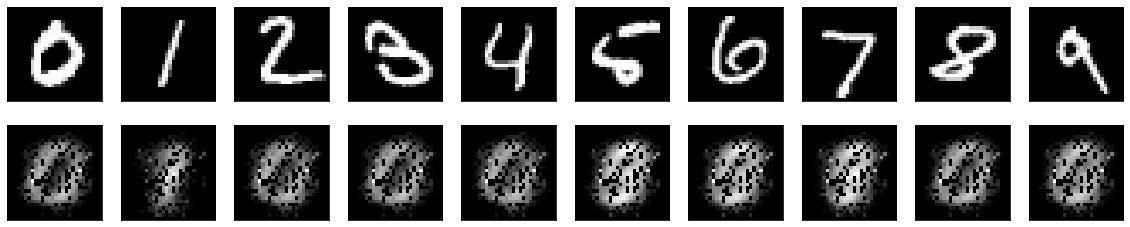




Hidden Layer Neuron Count: 5


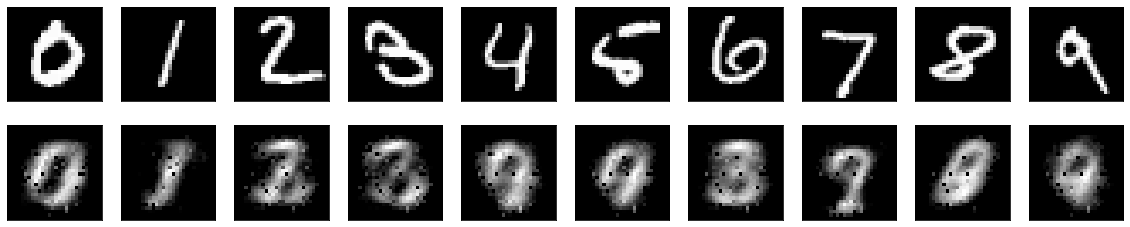




Hidden Layer Neuron Count: 10


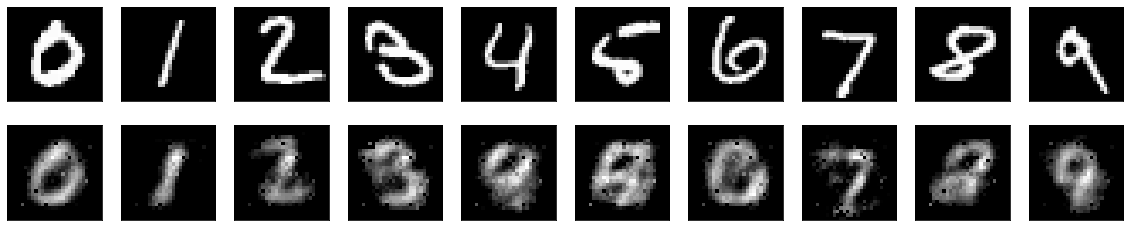

In [9]:
##Plot original image and the reconstructed Image
for n in range(len(N)):
    print('Hidden Layer Neuron Count:', N[n])
    plt.figure(figsize=(20,4))
    for i in range(10):
        ax=plt.subplot(2, 10, i+1)
        plt.imshow(testarr[i].reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax=plt.subplot(2, 10, i+11)
        plt.imshow(pred[n][i].reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    print('\n\n')

In [10]:
print(model_metrics_1.history.keys())

dict_keys(['loss', 'mean_squared_error', 'cosine_proximity', 'kullback_leibler_divergence'])


<Figure size 432x288 with 0 Axes>

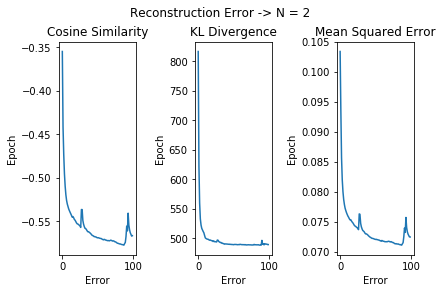

In [18]:
plt.figure()
fig, ax=plt.subplots(1, 3, constrained_layout=True)
ax[0].plot(model_metrics_1.history['cosine_proximity'])
ax[1].plot(model_metrics_1.history['kullback_leibler_divergence'])
ax[2].plot(model_metrics_1.history['mean_squared_error'])
ax[0].set_title('Cosine Similarity')
ax[1].set_title('KL Divergence')
ax[2].set_title('Mean Squared Error')
ax[0].set_xlabel('Error')
ax[0].set_ylabel('Epoch')
ax[1].set_xlabel('Error')
ax[1].set_ylabel('Epoch')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('Epoch')
fig.suptitle('Reconstruction Error -> N = 2')
plt.show()

<Figure size 432x288 with 0 Axes>

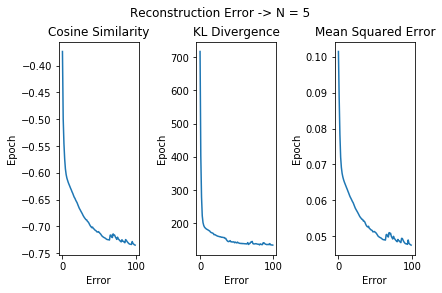

In [12]:
plt.figure()
fig, ax=plt.subplots(1, 3, constrained_layout=True)
ax[0].plot(model_metrics_2.history['cosine_proximity'])
ax[1].plot(model_metrics_2.history['kullback_leibler_divergence'])
ax[2].plot(model_metrics_2.history['mean_squared_error'])
ax[0].set_title('Cosine Similarity')
ax[1].set_title('KL Divergence')
ax[2].set_title('Mean Squared Error')
ax[0].set_xlabel('Error')
ax[0].set_ylabel('Epoch')
ax[1].set_xlabel('Error')
ax[1].set_ylabel('Epoch')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('Epoch')
fig.suptitle('Reconstruction Error -> N = 5')
plt.show()

<Figure size 432x288 with 0 Axes>

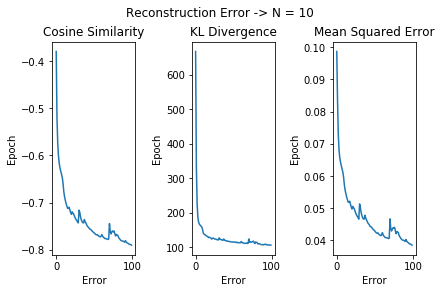

In [13]:
plt.figure()
fig, ax=plt.subplots(1, 3, constrained_layout=True)
ax[0].plot(model_metrics_3.history['cosine_proximity'])
ax[1].plot(model_metrics_3.history['kullback_leibler_divergence'])
ax[2].plot(model_metrics_3.history['mean_squared_error'])
ax[0].set_title('Cosine Similarity')
ax[1].set_title('KL Divergence')
ax[2].set_title('Mean Squared Error')
ax[0].set_xlabel('Error')
ax[0].set_ylabel('Epoch')
ax[1].set_xlabel('Error')
ax[1].set_ylabel('Epoch')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('Epoch')
fig.suptitle('Reconstruction Error -> N = 10')
plt.show()